<a href="https://colab.research.google.com/github/rbelay1/Final-Project/blob/main/Df_of_Brown_Noser_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install trafilatura

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
import os 
from bs4 import BeautifulSoup
from trafilatura import fetch_url
from trafilatura import extract
import pandas as pd
import urllib.parse
from textblob import TextBlob


data =[]
url_set = set()
for issue in range(25,125):
  url = f'http://thenoser.com/issue/{issue}'
  reqs = requests.get(url)
  soup = BeautifulSoup(reqs.text, 'html.parser')
  counter = 0
  for link in soup.find_all('a'):
      if '/article/' in link.get('href'):
        article_url = f"http://thenoser.com{link.get('href')}"
        parsed_url = urllib.parse.urlparse(article_url)
        normalized_url = parsed_url.scheme + "://" + parsed_url.netloc + parsed_url.path
        if normalized_url not in url_set:
          try: 
            article_html = fetch_url(article_url)
            article_text = extract(article_html)
            sentiment = TextBlob(article_text).sentiment.polarity
            data.append([article_url,issue,counter,article_text,sentiment])
            counter+=1
            url_set.add(normalized_url)
          except:
            print(f"Error occurred while processing {article_url}")
            pass
month_map={26: '11', 27: '12', 28: '12', 29: '02', 30: '03', 31: '04', 32: '10', 33: '11', 34: '02', 35: '04', 36: '10',
           37:'12', 38: '02', 39: '04', 40: '10', 41: '12', 42: '02', 43: '04', 59: '03', 60:'03', 62:'09', 63:'11', 64:'12',
           65:'03', 66: '03', 67:'09', 68:'10', 70:'12', 72:'03', 73: '04', 74:'09', 75:'12', 77: '12', 78: '03', 79:'04', 80: '10',
           82:'10', 84: '12', 85:'03', 86:'04', 87:'09', 88:'11', 89: '12', 90:'03', 91: '04', 92:'09',93:'11', 94: '12',
           95:'03', 96: '04', 97:'09', 98:'10', 99:'12', 100:'03', 101:'04', 102:'09', 103: '10', 104:'12', 107:'03', 108:'04',
           109:'09', 110:'10', 111:'02', 112:'03', 113:'04', 114:'09', 115:'10', 116:'12', 117:'02', 118:'03', 119:'04', 
           120:'09', 121:'10', 122:'12', 123:'02', 124:'04'}
year_map={26: '2006', 27: '2006', 28: '2006', 29: '2007', 30: '2007', 31: '2007', 32: '2007', 33: '2007', 34: '2008', 35: '2008', 36: '2008',
           37:'2008', 38: '2009', 39: '2009', 40: '2009', 41: '2009', 42: '2010', 43: '2010', 59: '2012', 60:'2012', 62:'2012', 63:'2012', 64:'2012',
           65:'2013', 66: '2013', 67:'2013', 68:'2013', 70:'2013', 72:'2014', 73: '2014', 74:'2014', 75:'2014', 77: '2014', 78: '2015', 79:'2015', 80: '2015',
           82:'10/2015', 84: '12/2015', 85:'03/2016', 86:'04/2016', 87:'09/2016', 88:'11/2016', 89: '12/2016', 90:'03/2017', 91: '04/2017', 92:'09/2017',93:'11/2017', 94: '12/2017',
           95:'2018', 96: '2018', 97:'2018', 98:'2018', 99:'2018', 100:'2019', 101:'2019', 102:'2019', 103: '2019', 104:'2019', 107:'2020', 108:'2020',
           109:'2020', 110:'2020', 111:'2021', 112:'2021', 113:'2021', 114:'2021', 115:'2021', 116:'2021', 117:'2022', 118:'2022', 119:'2022', 
           120:'2022', 121:'2022', 122:'2022', 123:'2023', 124:'2023'}
def get_publication_month(issue_number):
    return month_map.get(issue_number,'')
df = pd.DataFrame(data,columns=['url','issue number','article number','text','sentiment'])
df['publication month'] = df['issue number'].apply(get_publication_month)
def get_publication_year(issue_number):
    return year_map.get(issue_number, '')
df['publication year']= df['issue number'].apply(get_publication_year)
df = df.drop_duplicates()

In [ ]:
df

,url,issue number,article number,text,sentiment,publication month,publication year
0,http://thenoser.com/article/Simmons-Leaves-To-...,26,0,Following inquiries into to the cause of her r...,0.200916,11,2006
1,http://thenoser.com/article/Bagel-Gourmet-to-O...,26,1,Serving quality Mexican food and excessive amo...,0.006709,11,2006
2,http://thenoser.com/article/Cranky-Alcoholic-M...,26,2,The curmudgeonly behavior of local alcoholic R...,-0.091601,11,2006
3,http://thenoser.com/article/Secretary-of-Educa...,26,3,Explaining that American public school student...,0.090000,11,2006
4,http://thenoser.com/article/Hundreds-of-Bodies...,26,4,An unprecedented tragedy has befallen the peop...,0.048844,11,2006
...,...,...,...,...,...,...,...
1114,http://thenoser.com/article/Spring-Break-Frien...,124,11,Sources report that a local spring break frien...,0.010431,04,2023
1115,http://thenoser.com/article/Brown-University-T...,124,12,Brown University recently announced the succes...,0.141912,04,2023
1116,http://thenoser.com/article/Report-Aunt-Makes-...,124,13,"After calling her sister, your mom has informe...",0.411905,04,2023
1117,http://thenoser.com/article/Shitty-Love-Affair...,124,14,Sources report that shitty love affair is not ...,0.118750,04,2023


In [ ]:
df[(df['article number'] == 0) & (df['issue number'] == 26)]

,url,issue number,article number,text,sentiment,publication date
0,http://thenoser.com/article/Simmons-Leaves-To-...,26,0,Following inquiries into to the cause of her r...,0.200916,11/2006


(26.0, 124.0)

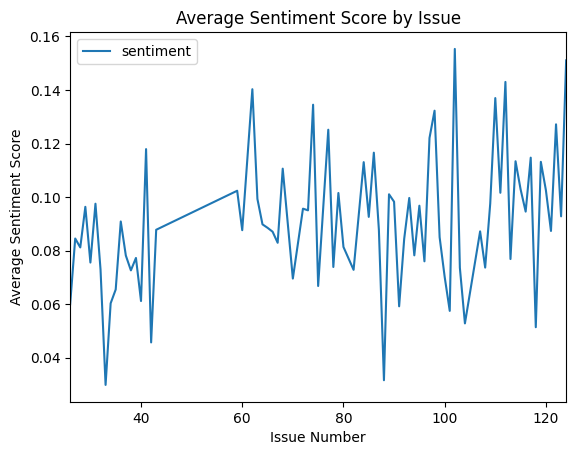

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## created new df with sentiment score mean based on issue and plotted the mean for each issue on line graph
avg_in = df.groupby('issue number')['sentiment'].mean().reset_index()
avg_in.plot(x='issue number', y= 'sentiment', title = 'Average Sentiment Score by Issue', xlabel='Issue Number', ylabel='Average Sentiment Score')
plt.xlim(26,124)



In [ ]:
def categorize_season(month):
    if month in ['01', '02', '03', '04', '05', '06']:
        return 'Spring'
    elif month in ['07', '08', '09', '10', '11', '12']:
        return 'Fall'
    else:
        return ''
df['season'] = df['publication month'].apply(categorize_season)
df

,url,issue number,article number,text,sentiment,publication month,publication year,season
0,http://thenoser.com/article/Simmons-Leaves-To-...,26,0,Following inquiries into to the cause of her r...,0.200916,11,2006,Fall
1,http://thenoser.com/article/Bagel-Gourmet-to-O...,26,1,Serving quality Mexican food and excessive amo...,0.006709,11,2006,Fall
2,http://thenoser.com/article/Cranky-Alcoholic-M...,26,2,The curmudgeonly behavior of local alcoholic R...,-0.091601,11,2006,Fall
3,http://thenoser.com/article/Secretary-of-Educa...,26,3,Explaining that American public school student...,0.090000,11,2006,Fall
4,http://thenoser.com/article/Hundreds-of-Bodies...,26,4,An unprecedented tragedy has befallen the peop...,0.048844,11,2006,Fall
...,...,...,...,...,...,...,...,...
1114,http://thenoser.com/article/Spring-Break-Frien...,124,11,Sources report that a local spring break frien...,0.010431,04,2023,Spring
1115,http://thenoser.com/article/Brown-University-T...,124,12,Brown University recently announced the succes...,0.141912,04,2023,Spring
1116,http://thenoser.com/article/Report-Aunt-Makes-...,124,13,"After calling her sister, your mom has informe...",0.411905,04,2023,Spring
1117,http://thenoser.com/article/Shitty-Love-Affair...,124,14,Sources report that shitty love affair is not ...,0.118750,04,2023,Spring


   season  sentiment
0           0.134498
1    Fall   0.092858
2  Spring   0.086308


(26.0, 124.0)

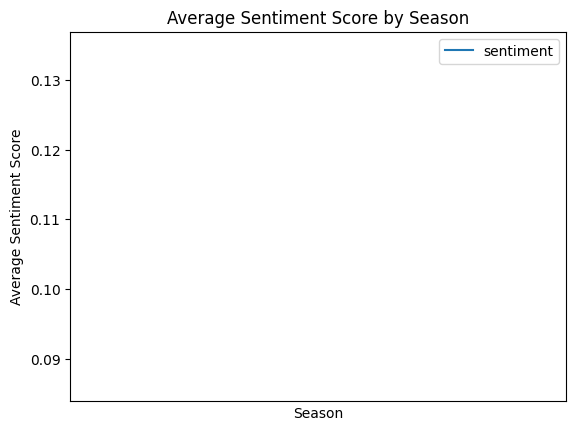

In [ ]:
avg_szn = df.groupby('season')['sentiment'].mean().reset_index() #creating df with sentiment mean based on season
print(avg_szn)
avg_szn.plot(x='season', y= 'sentiment', title = 'Average Sentiment Score by Season', xlabel='Season', ylabel='Average Sentiment Score')
plt.xlim(26,124)



In [ ]:
## Trying to create another plot that categorizes the publication dates into Spring and Fall and looks at the mean sentiment for each
szn_df = df['season'] = '' #creates new dataframe with new column, "season"

for ii, row in df.iterrows(): #iterates through the rows
  month = row['publication date'].month #tried to extract the month but an error occurs here because dates 
                                        #in the df are in number form and do not explicitly say the month
  if month >= 9 and month <= 12: #if the month is btw Sep and Dec
    df.at[ii, 'season'] = 'Fall' #assign it to "fall" in 'season' column
  elif month >= 1 and month <= 5:  #if the month is btw Jan and May
    df.at[ii, 'season'] = 'Spring' #assign it to "spring" in 'season' column

avg_szn = df.groupby('season')['sentiment'].mean().reset_index() #creating df with sentiment mean based on season
avg_szn.plot(x='season', y= 'sentiment', title = 'Average Sentiment Score by Season', xlabel='Season', ylabel='Average Sentiment Score')
plt.xlim(26,124)

<ipython-input-19-cb1bb388fd59>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('publication month').mean()


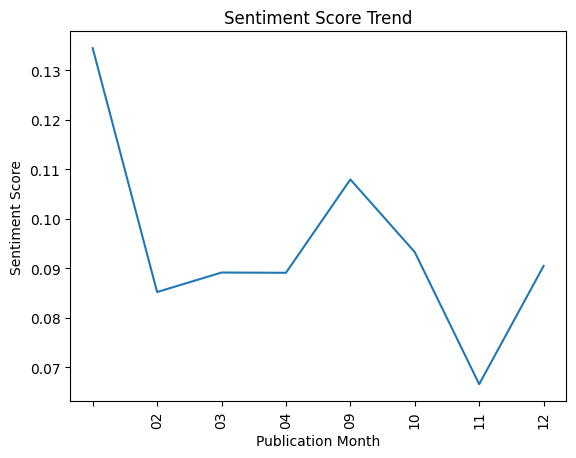

In [ ]:
#Sentiment Score Trend over a year
import matplotlib.pyplot as plt
import pandas as pd

df = df.groupby('publication month').mean()

plt.plot(df.index, df['sentiment'])
plt.xlabel('Publication Month')
plt.xticks(rotation=90)
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score Trend')
plt.show()


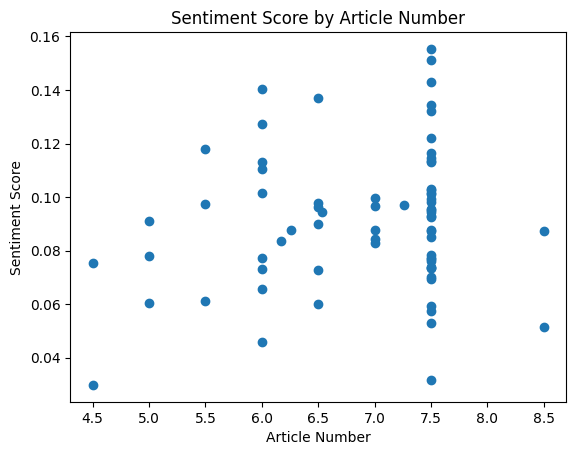

In [ ]:
#Plotting sentiment scores by article number
plt.scatter(df['article number'], df['sentiment'])
plt.xlabel('Article Number')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score by Article Number')
plt.show()


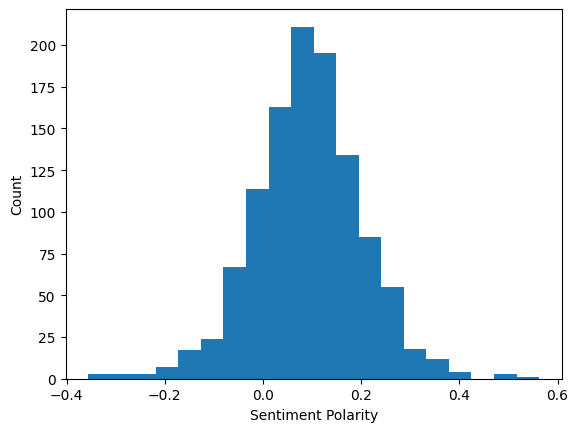

In [ ]:
#Histogram of sentiment distribution in data
import matplotlib.pyplot as plt

sentiment_values = [row[4] for row in data]
plt.hist(sentiment_values, bins=20)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Count')
plt.show()